# 1.Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -al '/content/drive/MyDrive/Fastcampus_OpenCV/darknet'

total 12
drwx------ 2 root root 4096 Oct  3 12:40 cfg
drwx------ 2 root root 4096 Oct  3 12:29 data
drwx------ 2 root root 4096 Oct  3 12:27 weights


In [ ]:
# File
weight_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/weights/yolov3.weights'
cfg_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/cfg/yolov3.cfg'
name_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/data/coco.names'

# 2.Load File

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
min_confidence = 0.5 # 객체 신뢰도 0.5 이상인 객체만 감지

In [ ]:
# Load Yolo Model
net = cv2.dnn.readNet(weight_file, cfg_file)

In [ ]:
classes = []  # 어떤 클래스가 감지 되었는지 사용됨
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()  # YOLO레이어 이름

In [ ]:
classes[:4]

['person', 'bicycle', 'car', 'motorbike']

In [ ]:
layer_names[:4]

('conv_0', 'bn_0', 'leaky_1', 'conv_1')

In [ ]:
# 반환된 값을 출력하여 확인
unconnected_layers = net.getUnconnectedOutLayers() # 인덱스 목록 얻기
print("Unconnected Layers:", unconnected_layers)
output_layers = [layer_names[i - 1] for i in unconnected_layers] # layer 이름 가져오기

Unconnected Layers: [200 227 254]


In [ ]:
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
# 색상 저장
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
# car1 Upload
from google.colab import files
files.upload()

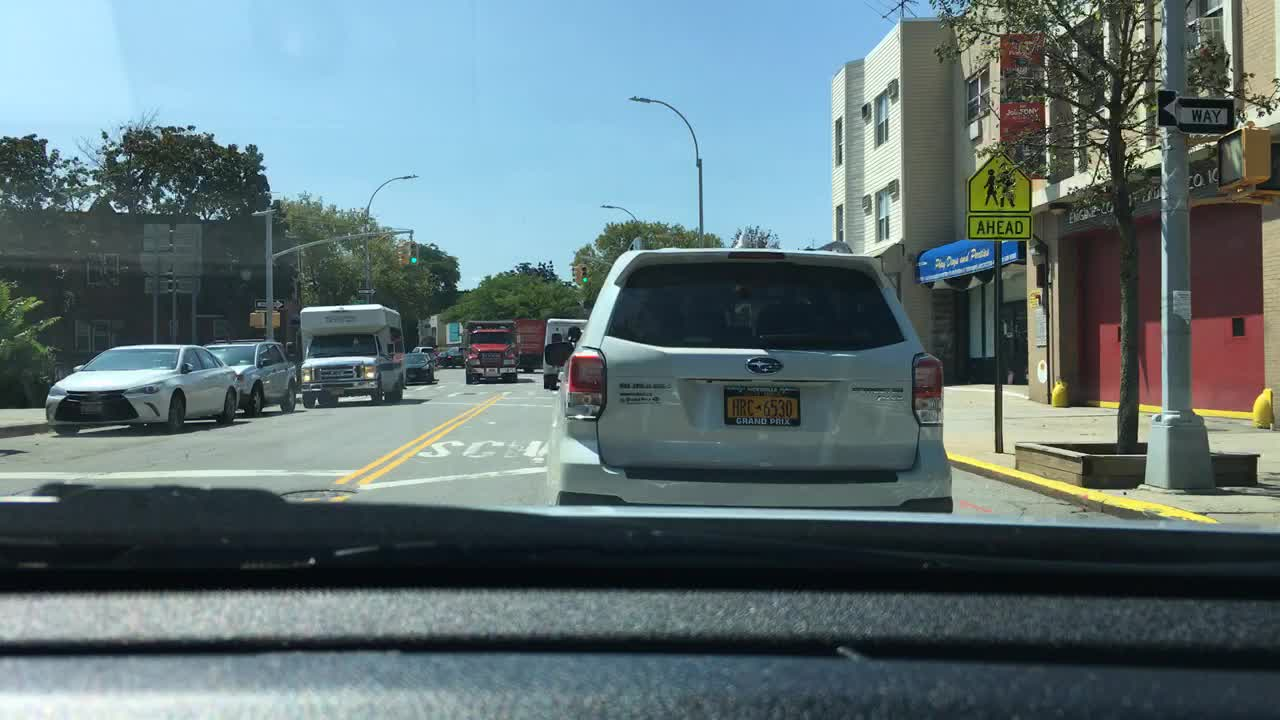

In [ ]:
img = cv2.imread('car1.jpg')
height, width, channels = img.shape
cv2_imshow(img)

In [ ]:
# Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

0 car
4 truck
8 car
11 car
13 traffic light
15 car
17 truck
18 truck


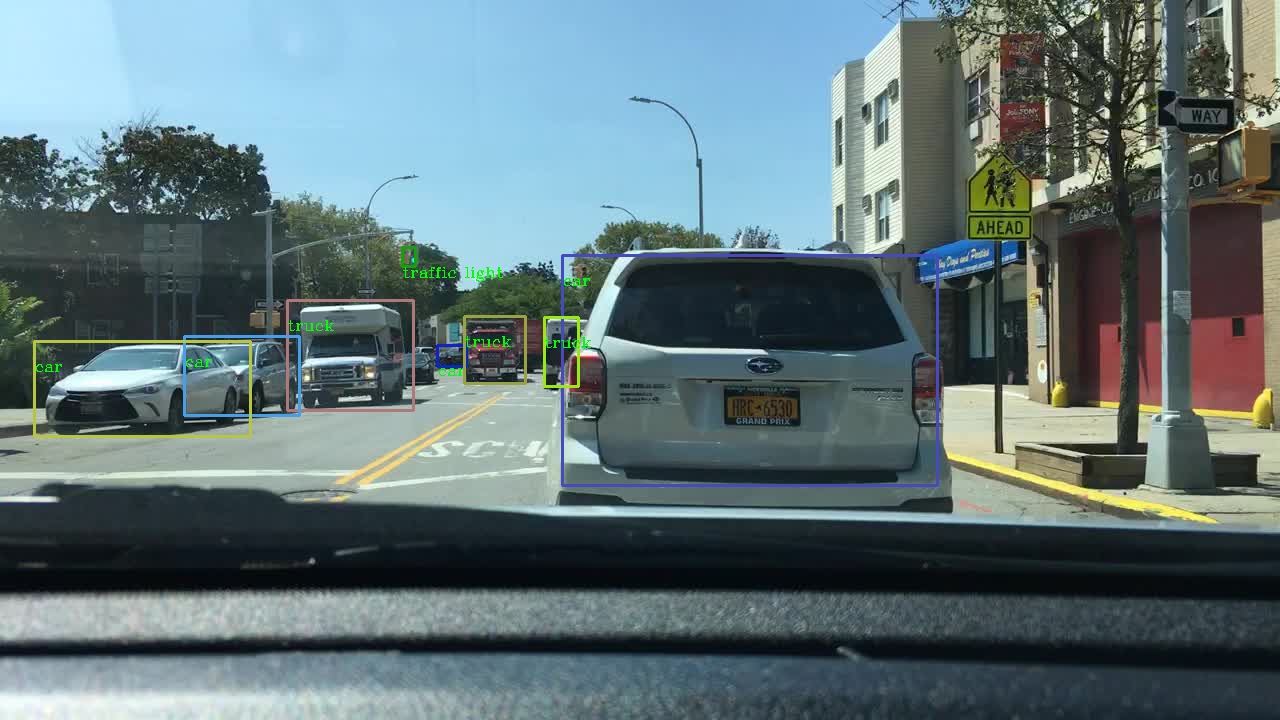

In [ ]:
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(i, label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 0.5, (0, 255, 0), 1)

cv2_imshow(img)

# 1.Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -al '/content/drive/MyDrive/Fastcampus_OpenCV/darknet'

total 12
drwx------ 2 root root 4096 Oct  3 12:40 cfg
drwx------ 2 root root 4096 Oct  3 12:29 data
drwx------ 2 root root 4096 Oct  3 12:27 weights


In [ ]:
weight_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/weights/yolov3.weights'
cfg_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/cfg/yolov3.cfg'
name_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/data/coco.names'

from google.colab import files
files.upload()

In [ ]:
file_name = 'obama_01.mp4'

# 2.Load File

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [ ]:
min_confidence = 0.5

In [ ]:
# Load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

In [ ]:
classes = []
with open(name_file, 'r') as f:
  classes = [line.strip() for line in f.readlines()]

unconnected_layers = net.getUnconnectedOutLayers()
output_layers = [layer_names[i - 1] for i in unconnected_layers]

colors = np.random.uniform(0, 255, size = (len(classes), 3))

In [ ]:
# Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

error: ignored

In [ ]:
def detectAndDisplay(frame):
  IPython.display.clear_output(wait = True)
  height, width, channedls = frame.shape
  # Detecting objects
  # https://docs.opencv.org/master/d6/d0f/group__dnn.html
  blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

  net.setInput(blob)
  outs = net.forward(output_layers)

  class_ids = []
  confidences = []
  boxes = []

  for out in outs:
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > min_confidence:
              # Object detected
              center_x = int(detection[0] * width)
              center_y = int(detection[1] * height)
              w = int(detection[2] * width)
              h = int(detection[3] * height)

              # Rectangle coordinates
              x = int(center_x - w / 2)
              y = int(center_y - h / 2)

              boxes.append([x, y, w, h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
  font = cv2.FONT_HERSHEY_COMPLEX
  for i in range(len(boxes)):
      if i in indexes:
          x, y, w, h = boxes[i]
          label = str(classes[class_ids[i]])
          print(i, label)
          color = colors[i]
          cv2.rectangle(frame, (x, y), (x +
                                        w, y + h), color, 2)
          cv2.putText(frame, label, (x, y + 30), font, 0.5, (0, 255, 0), 1)

  cv2_imshow(frame)

In [ ]:
##-- 2.Read the video stream
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
  print('(!) Error')
  exit(0)
while True:
  ret, frame = cap.read()
  if frame is None:
    print('--(!) Break')
    break
  detectAndDisplay(frame)

0 person


error: ignored